<br><br>

<font color=#191347 ><font>
<p style = "font-family:times;">
    <font size="7">
        Interactive Learning 
    </font>    
</p>

<br>
    
<font color=#ed1c24><font>
<p style = "font-family:optima;">
    <font size="6">
        Homework #1
    </font>    
<font color=#000000> <font>
</p>

> $\textit{Mohammad Saadati - 810198410}$

In [48]:
from BP_reward import get_reward
import random
import matplotlib.pyplot as plt
import numpy as np

STUDENT_ID = 810198410
P_SW = 0.8
P_SL = 0.7

# Question 2

In [89]:
def draw_reward_trial_plot(rewards, doctor_name, _color):
    plt.figure(figsize=(8,6))
    plt.plot(range(1,101), rewards, label="reward", color = _color)
    plt.ylabel('sum of rewrads')
    plt.xlabel('trial')
    plt.title('Sum of rewards for Doctor '+ doctor_name)
    plt.legend()
    plt.grid()
    plt.show()

## Doctor A

In [90]:
def doctor_a_single_action(prev_action):
    another_action = 2 if prev_action == 1 else 1  
    reward = get_reward(prev_action, STUDENT_ID)
    next_action = None
    
    if reward > 0:
        if random.random() < P_SW:
            next_action = prev_action
        else:
            next_action = another_action
    else:
        if random.random() > P_SL:
            next_action = prev_action
        else:
            next_action = another_action
            
    return next_action, reward

In [91]:
def doctor_a_approach():
    all_rewards = []
    sum_rewards = 0

    action = random.randint(1, 2)
    for i in range(100):
        action, reward = doctor_a_single_action(action)
        sum_rewards += reward
        all_rewards.append(sum_rewards)
        
    return all_rewards

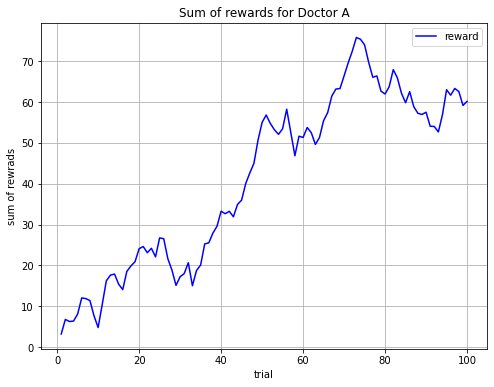

In [92]:
all_rewards = doctor_a_approach()

draw_reward_trial_plot(all_rewards, "A", 'b')

# Doctor B

In [93]:
def doctor_b_single_action():
    action = random.randint(1, 2) 
    reward = get_reward(action, STUDENT_ID)
    return reward

In [94]:
def doctor_b_approach():
    all_rewards = []
    sum_rewards = 0

    for i in range(100):
        reward = doctor_b_single_action()
        sum_rewards += reward
        all_rewards.append(sum_rewards)
        
    return all_rewards

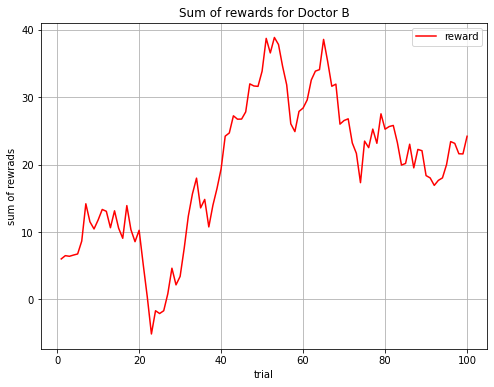

In [95]:
all_rewards = doctor_b_approach()

draw_reward_trial_plot(all_rewards, "B", 'r')

# Doctor C

In [96]:
def doctor_c_approach():
    all_rewards = []
    sum_rewards = 0

    for i in range(10):
        reward = get_reward(1, STUDENT_ID)
        sum_rewards += reward
        all_rewards.append(sum_rewards)

    for i in range(10):
        reward = get_reward(2, STUDENT_ID)
        sum_rewards += reward
        all_rewards.append(sum_rewards)

    best_action = 1 if all_rewards[9] > (all_rewards[19] - all_rewards[9]) else 2

    for i in range(8):
        for j in range(7):
            reward = get_reward(best_action, STUDENT_ID)
            sum_rewards += reward
            all_rewards.append(sum_rewards)
        for j in range(3):
            action = random.randint(1, 2)
            reward = get_reward(action, STUDENT_ID)
            sum_rewards += reward
            all_rewards.append(sum_rewards)
    
    return all_rewards

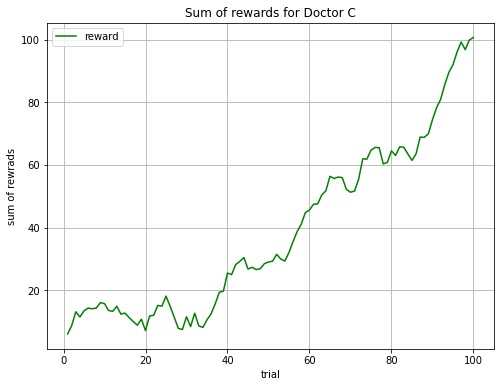

In [97]:
all_rewards = doctor_c_approach()

draw_reward_trial_plot(all_rewards, "C", 'g')

# Question 3

In [103]:
def draw_confidence_interval(all_rewards, doctor_name):
    lower_bound = np.percentile(all_rewards, 2.5)
    upper_bound  = np.percentile(all_rewards, 97.5)
    print('Lower bound:',lower_bound)
    print('Upper bound: ',upper_bound)

    all_rewards = np.array(all_rewards)

    plt.figure(figsize=(8,6))
    plt.hist(all_rewards[all_rewards<lower_bound], color='r', label="Outside the confidence interval")
    plt.hist(all_rewards[(all_rewards>=lower_bound)&(all_rewards<=upper_bound)], color='g', label="Inside the confidence interval")
    plt.hist(all_rewards[all_rewards>upper_bound], color='r')
    plt.title("95% confidence interval on the rewards of doctor " + doctor_name +" approach")
    plt.xlabel("reward")
    plt.ylabel("frequency")
    plt.legend()
    plt.grid()
    plt.show()

## 5

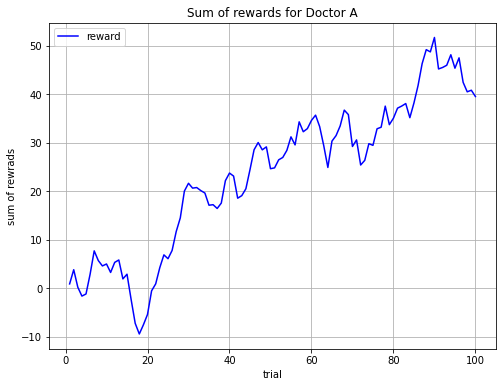

Lower bound: -6.383182171727909
Upper bound:  48.41205640526339


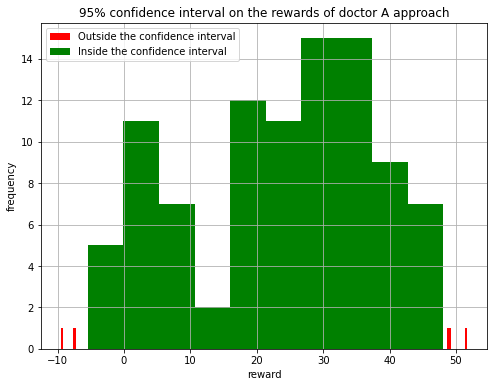

--------------------------------------------------------------------


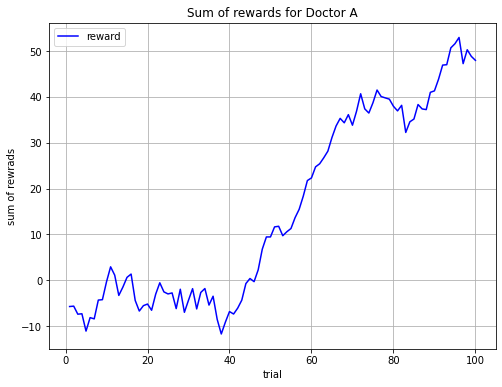

Lower bound: -8.840911042990875
Upper bound:  50.492286369735865


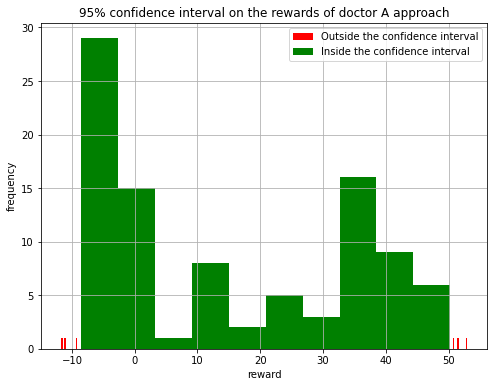

--------------------------------------------------------------------


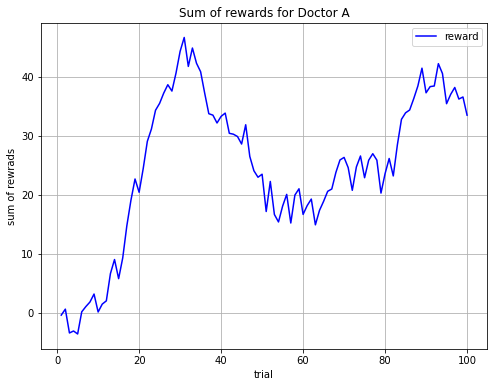

Lower bound: -1.7889342281398244
Upper bound:  43.33379891785899


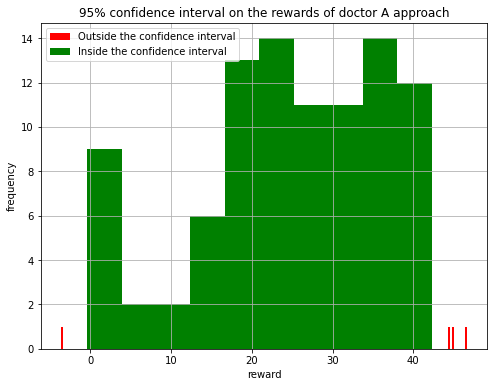

--------------------------------------------------------------------


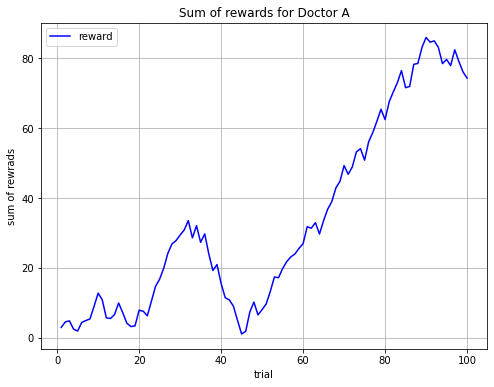

Lower bound: 2.1313840111695455
Upper bound:  83.92750993629356


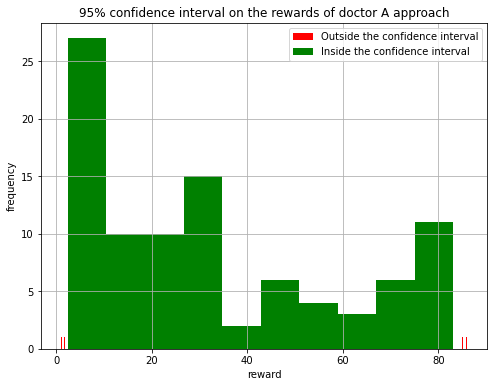

--------------------------------------------------------------------


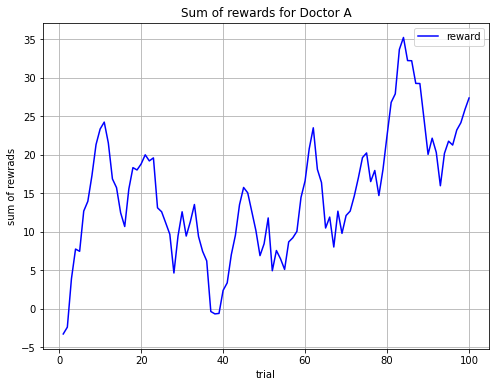

Lower bound: -0.6154738184997965
Upper bound:  32.240422014514


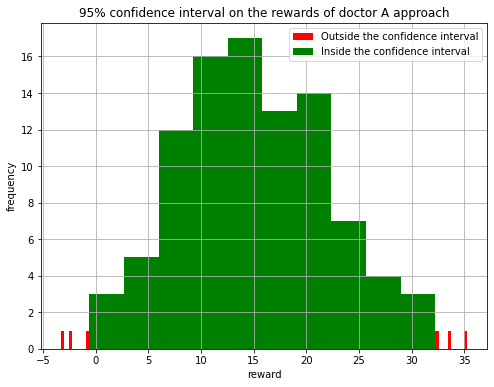

--------------------------------------------------------------------


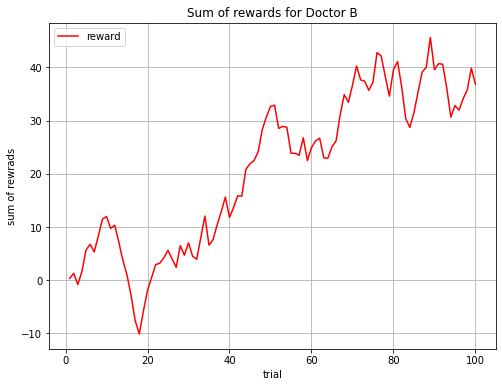

Lower bound: -4.439032924464963
Upper bound:  41.673018920572055


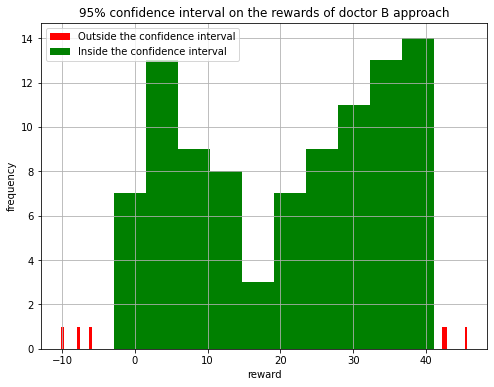

--------------------------------------------------------------------


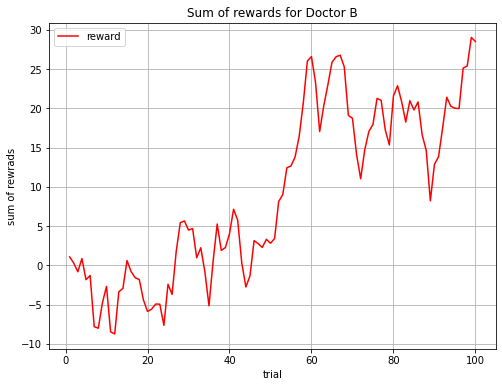

Lower bound: -7.919576976004174
Upper bound:  26.683523832596777


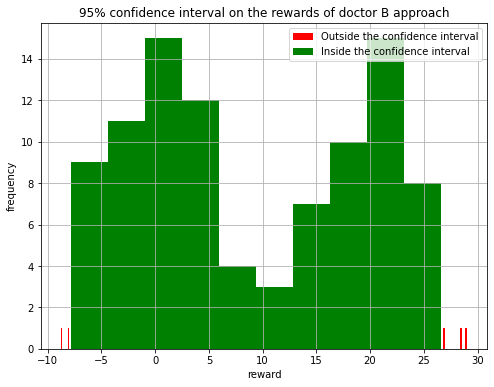

--------------------------------------------------------------------


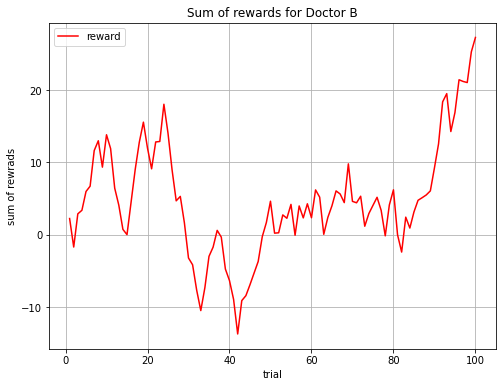

Lower bound: -8.983186058505334
Upper bound:  21.30450397909249


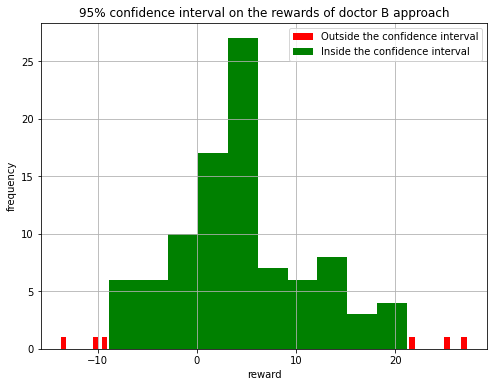

--------------------------------------------------------------------


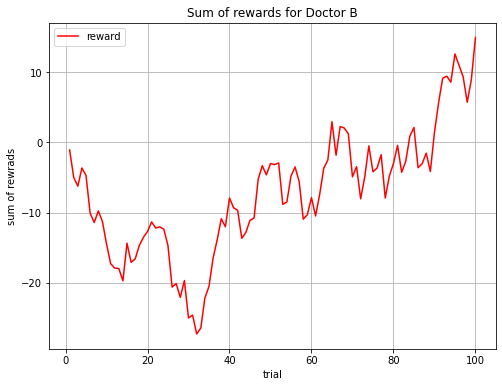

Lower bound: -24.813461566483674
Upper bound:  10.253944416465968


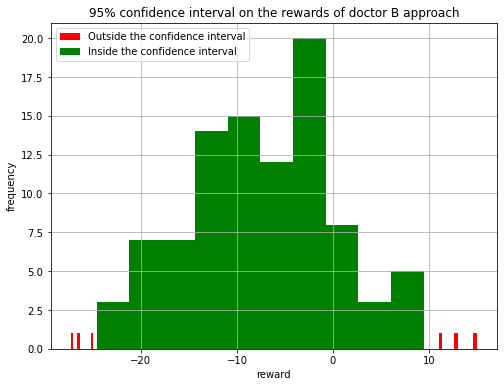

--------------------------------------------------------------------


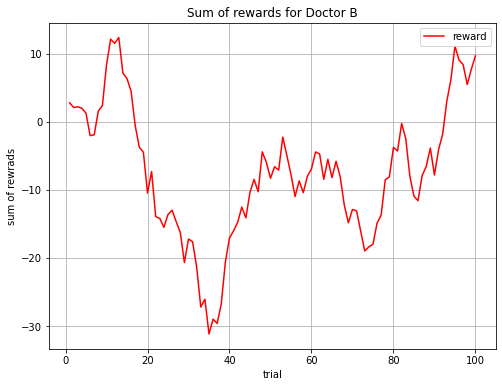

Lower bound: -28.150610852406025
Upper bound:  11.316563783805734


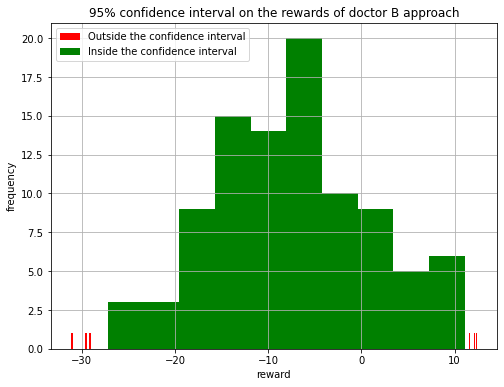

--------------------------------------------------------------------


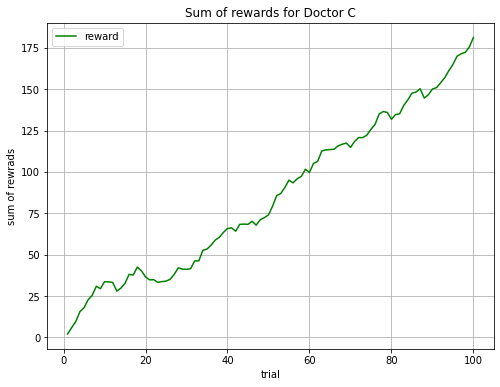

Lower bound: 12.450413615455696
Upper bound:  171.8445854654881


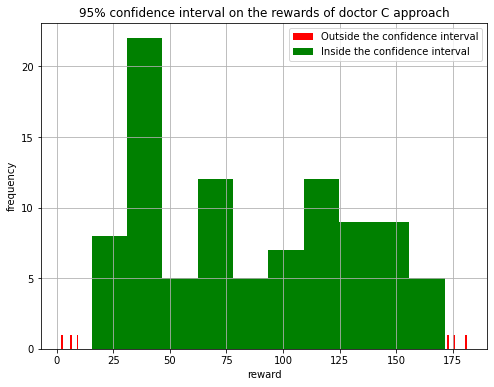

--------------------------------------------------------------------


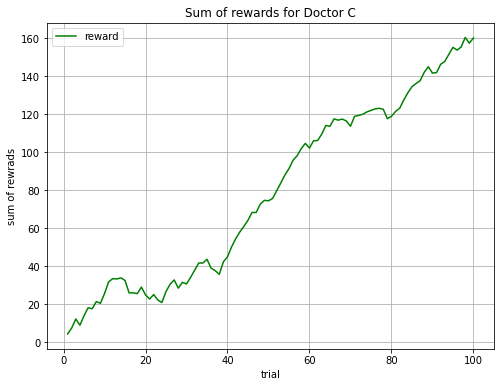

Lower bound: 10.565141532299554
Upper bound:  156.32696945213934


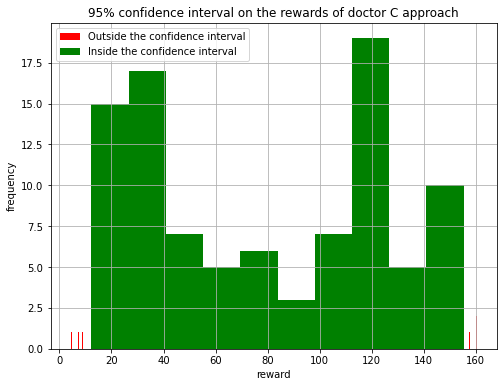

--------------------------------------------------------------------


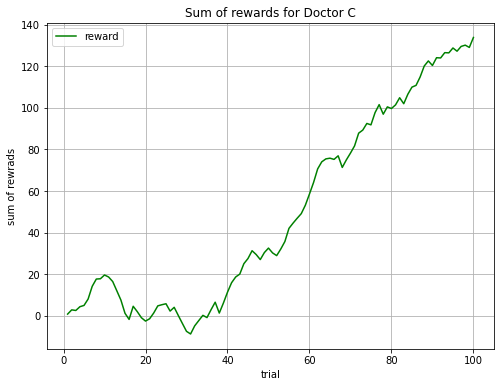

Lower bound: -4.307855858309417
Upper bound:  129.29774300369368


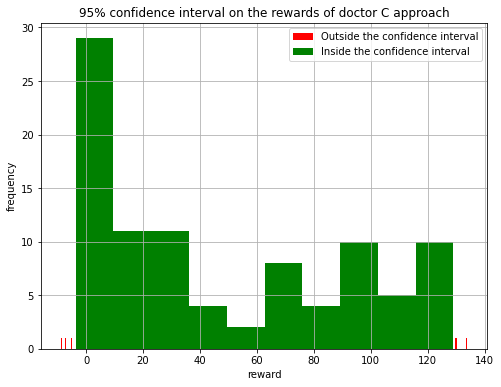

--------------------------------------------------------------------


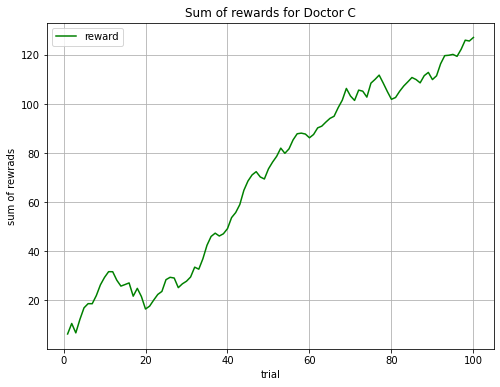

Lower bound: 11.425525788908967
Upper bound:  124.01538373333634


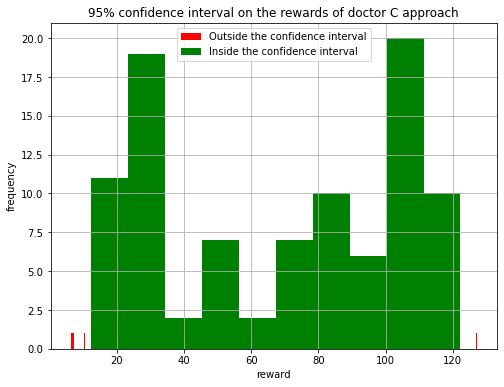

--------------------------------------------------------------------


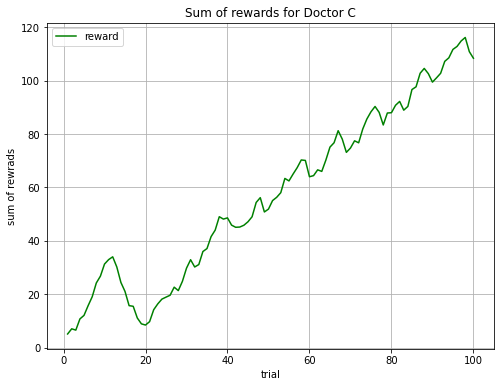

Lower bound: 7.7300956598442045
Upper bound:  112.24852087928681


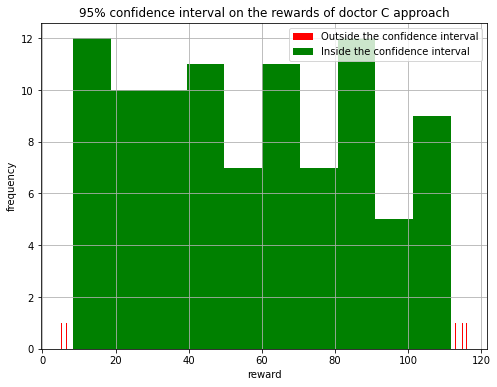

--------------------------------------------------------------------


In [107]:
for i in range(5):
    all_rewards = doctor_a_approach()
    draw_reward_trial_plot(all_rewards, "A", 'b')
    draw_confidence_interval(all_rewards, "A")
    print("--------------------------------------------------------------------")
    
print("=================================================================================")
    
for i in range(5):
    all_rewards = doctor_b_approach()
    draw_reward_trial_plot(all_rewards, "B", 'r')
    draw_confidence_interval(all_rewards, "B")
    print("--------------------------------------------------------------------")
    
print("=================================================================================")
    
for i in range(5):
    all_rewards = doctor_c_approach()
    draw_reward_trial_plot(all_rewards, "C", 'g')
    draw_confidence_interval(all_rewards, "C")
    print("--------------------------------------------------------------------")

## 20

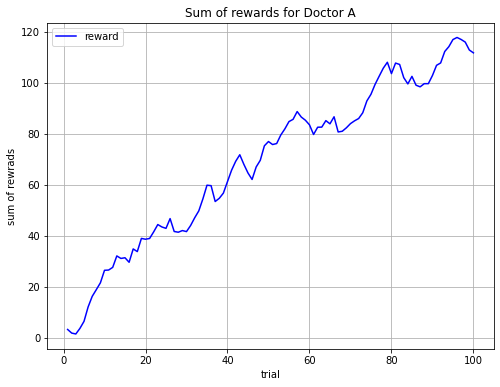

Lower bound: 3.461347112358658
Upper bound:  116.4601810353289


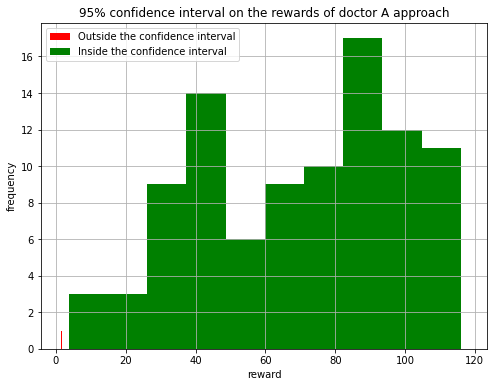

--------------------------------------------------------------------


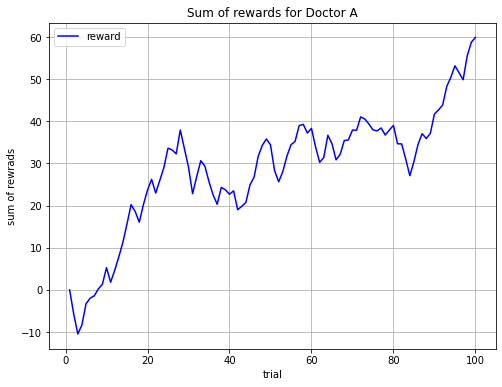

Lower bound: -4.555203122668329
Upper bound:  54.42051166716128


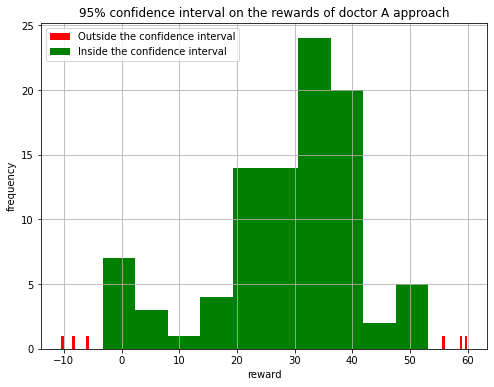

--------------------------------------------------------------------


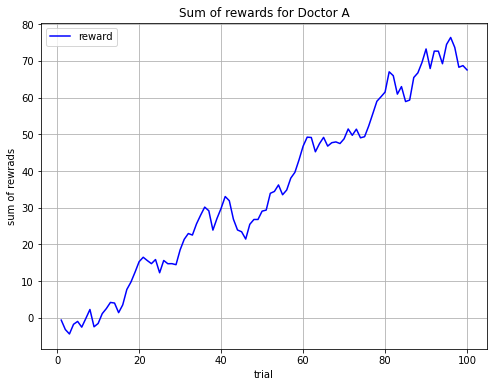

Lower bound: -2.490432713540064
Upper bound:  73.47797661544631


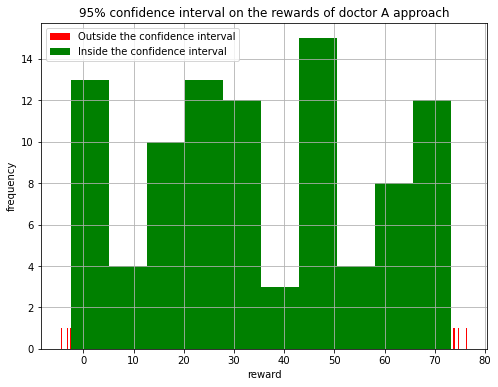

--------------------------------------------------------------------


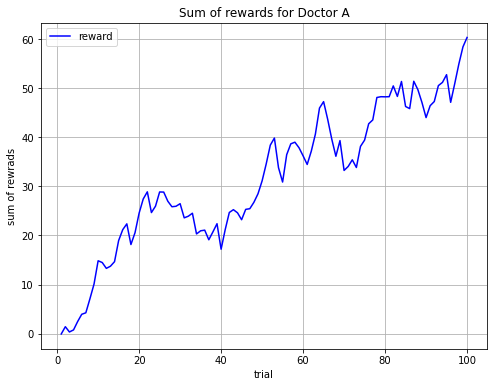

Lower bound: 1.0830321562438545
Upper bound:  53.8808332828867


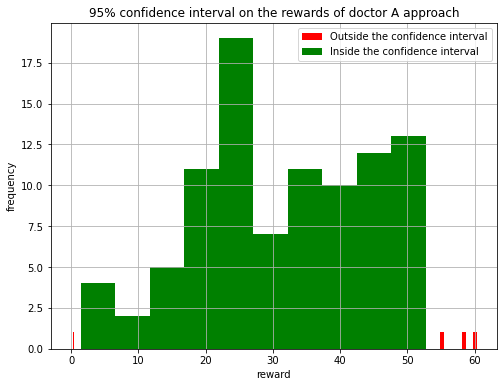

--------------------------------------------------------------------


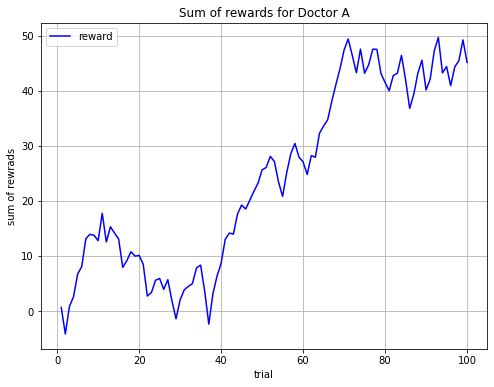

Lower bound: -0.43938324720194744
Upper bound:  48.42623949545915


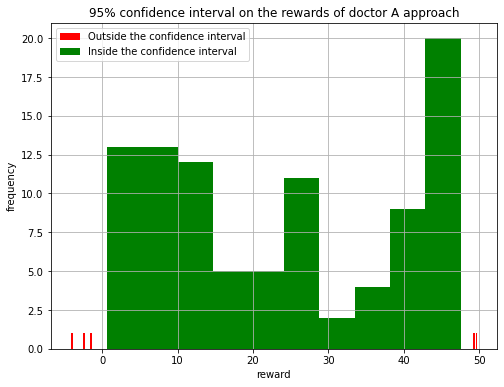

--------------------------------------------------------------------


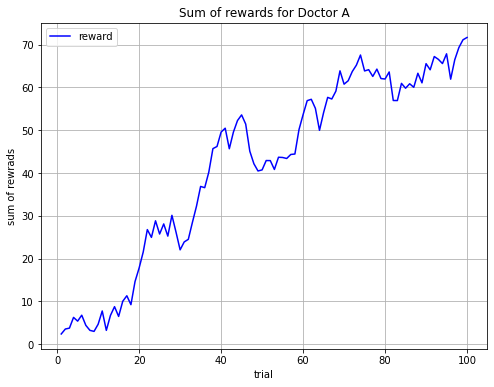

Lower bound: 3.2403606772925317
Upper bound:  68.59184829097602


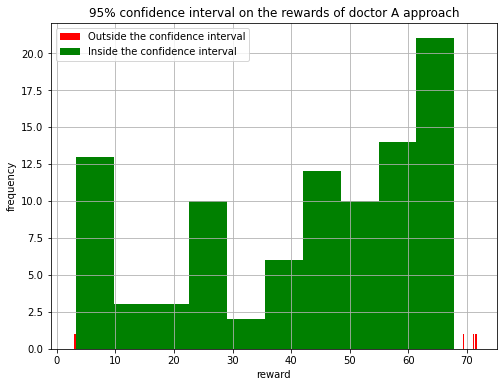

--------------------------------------------------------------------


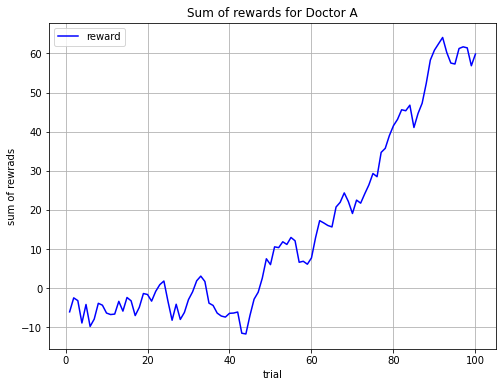

Lower bound: -9.394728003677407
Upper bound:  61.5590252471184


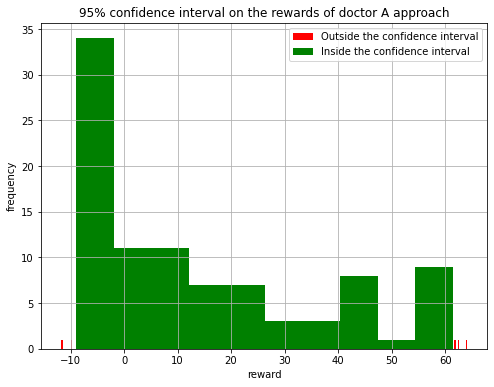

--------------------------------------------------------------------


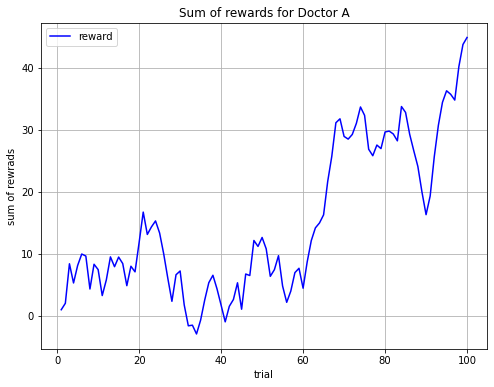

Lower bound: -1.2809770132552543
Upper bound:  38.33196271033374


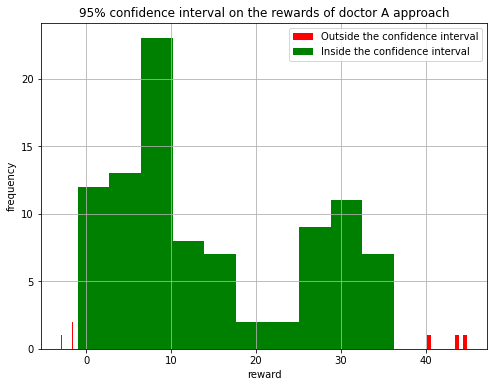

--------------------------------------------------------------------


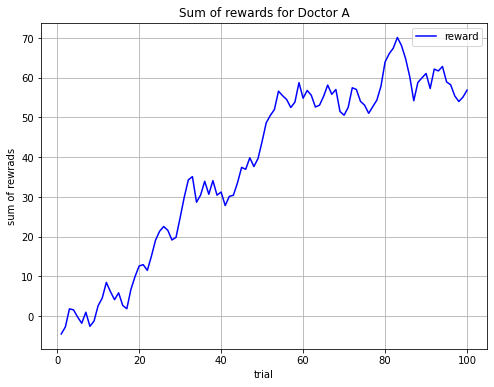

Lower bound: -2.1657377800254802
Upper bound:  66.76786630525133


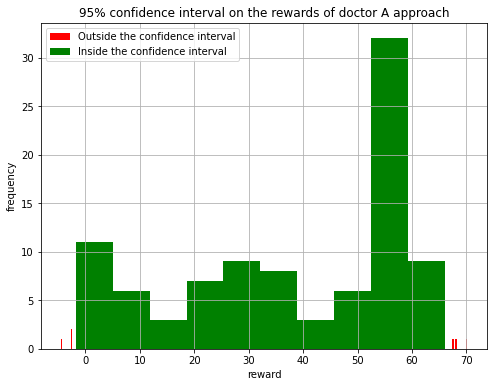

--------------------------------------------------------------------


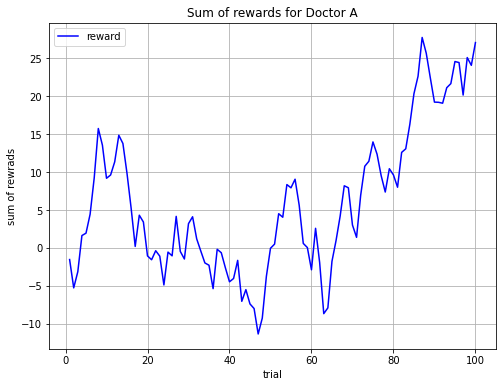

Lower bound: -8.352859138639351
Upper bound:  25.407153853722644


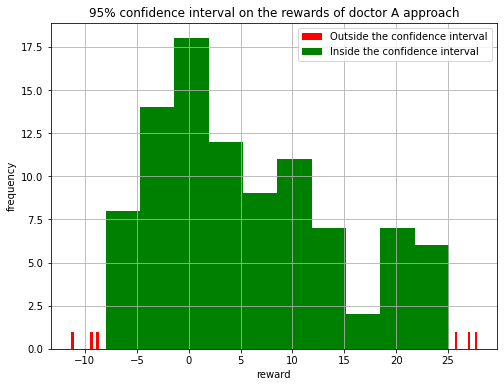

--------------------------------------------------------------------


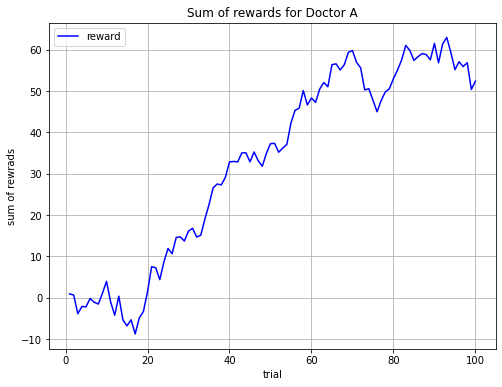

Lower bound: -5.35435520822482
Upper bound:  61.19634850216485


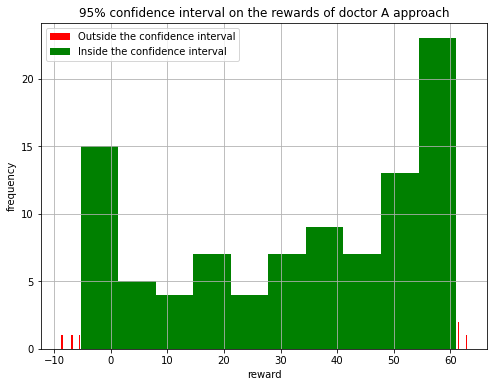

--------------------------------------------------------------------


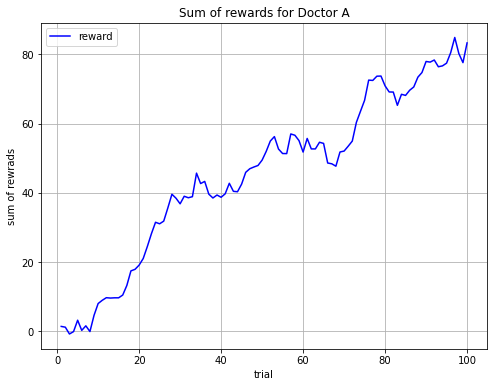

Lower bound: 0.08029469844132517
Upper bound:  80.3853391580358


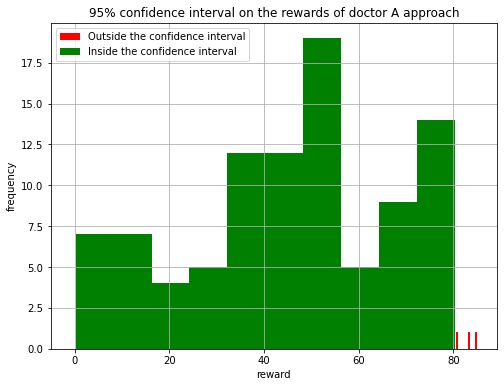

--------------------------------------------------------------------


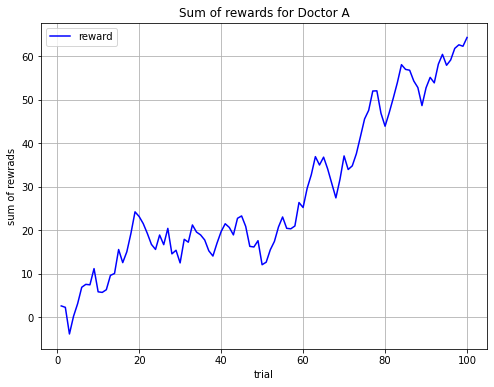

Lower bound: 2.487387698802754
Upper bound:  62.017562945031706


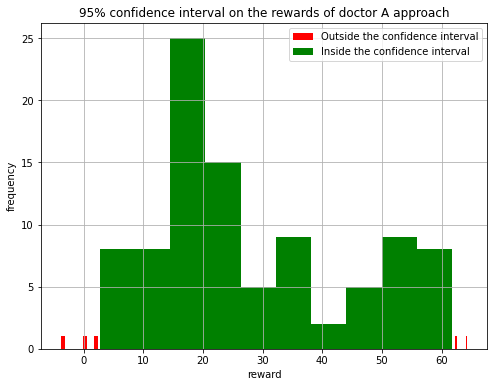

--------------------------------------------------------------------


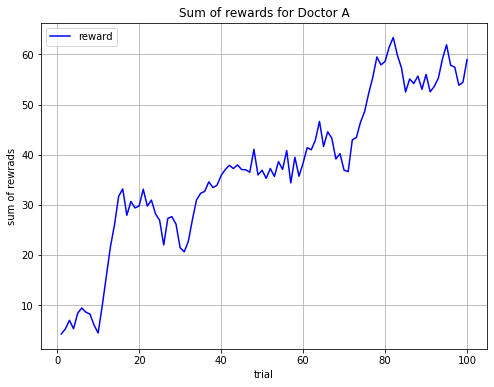

Lower bound: 5.241028336780113
Upper bound:  60.69311519098812


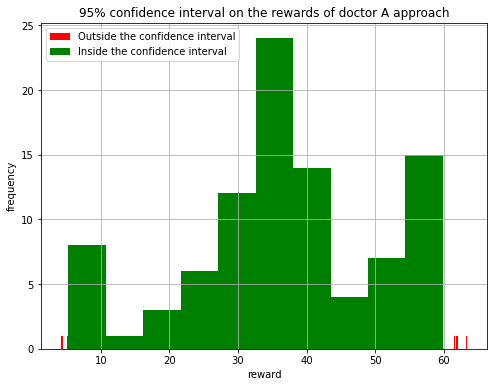

--------------------------------------------------------------------


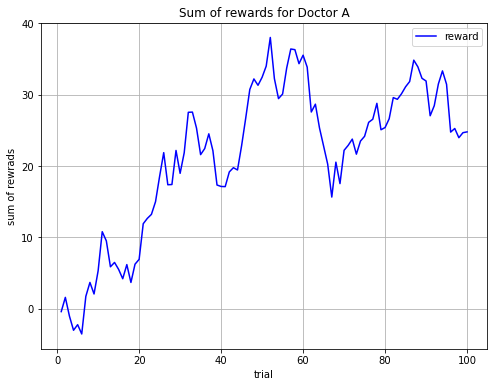

Lower bound: -1.6439182547879831
Upper bound:  35.909890746402795


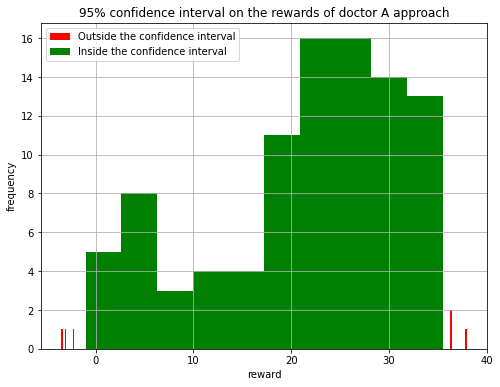

--------------------------------------------------------------------


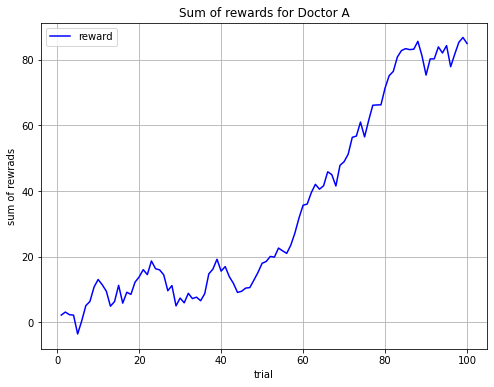

Lower bound: 2.17670811703887
Upper bound:  85.09977311376547


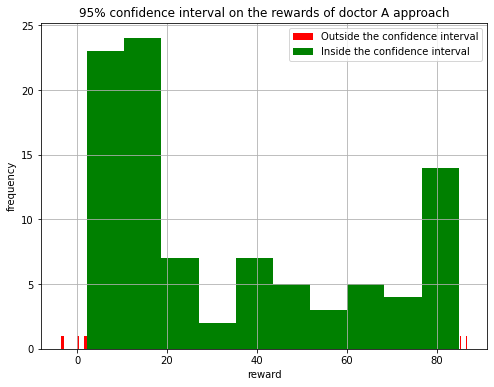

--------------------------------------------------------------------


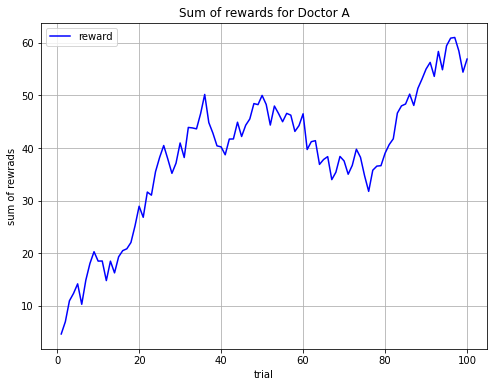

Lower bound: 10.595595190629227
Upper bound:  58.967380686729236


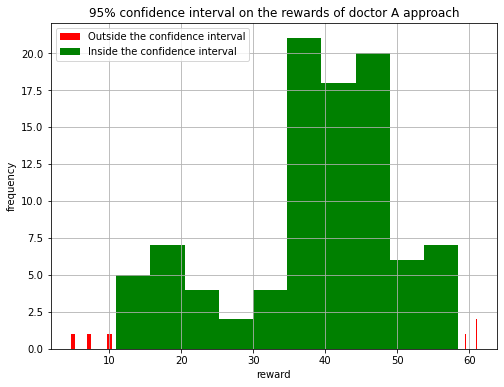

--------------------------------------------------------------------


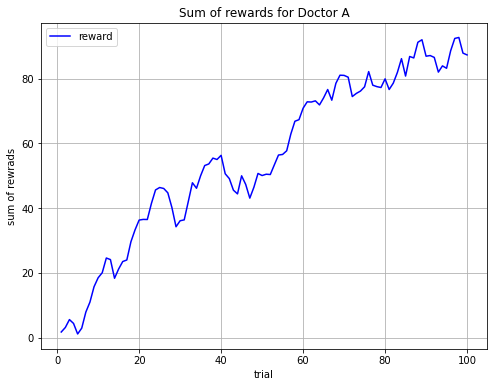

Lower bound: 2.9902947687098593
Upper bound:  91.67169725285315


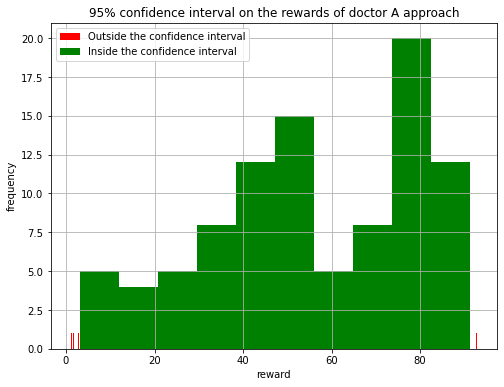

--------------------------------------------------------------------


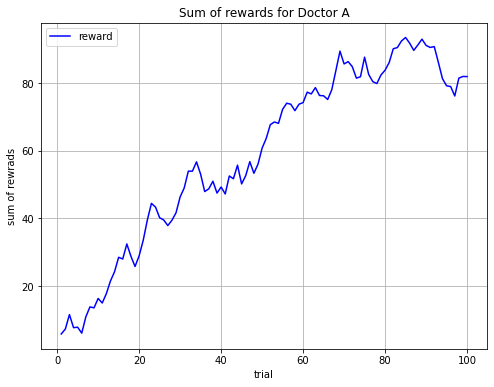

Lower bound: 7.520518986204806
Upper bound:  92.07682819705268


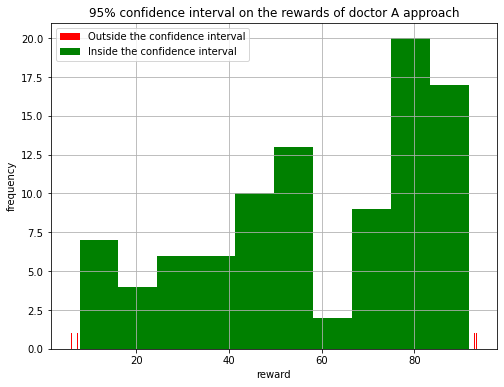

--------------------------------------------------------------------


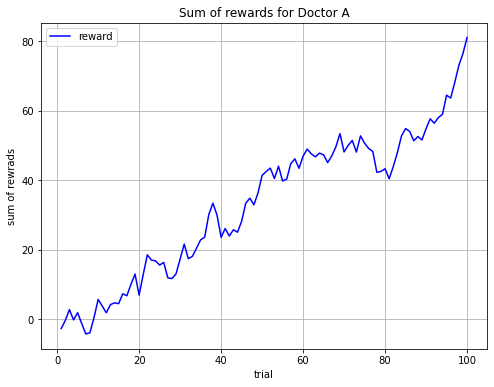

Lower bound: -1.976951586810428
Upper bound:  70.71148156942834


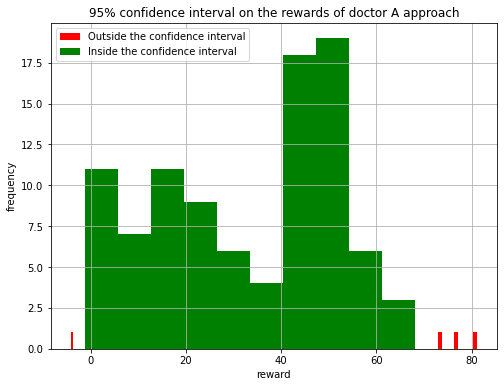

--------------------------------------------------------------------


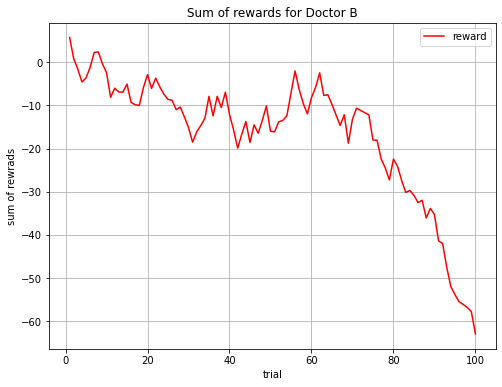

Lower bound: -56.475034611385794
Upper bound:  1.5735487232206022


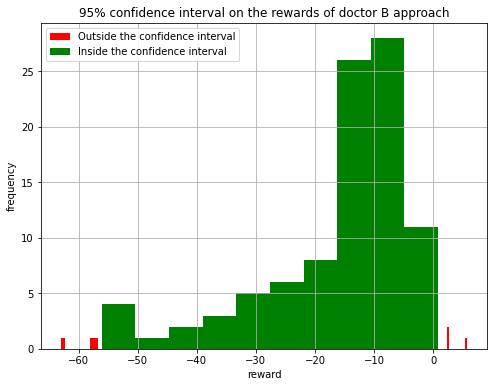

--------------------------------------------------------------------


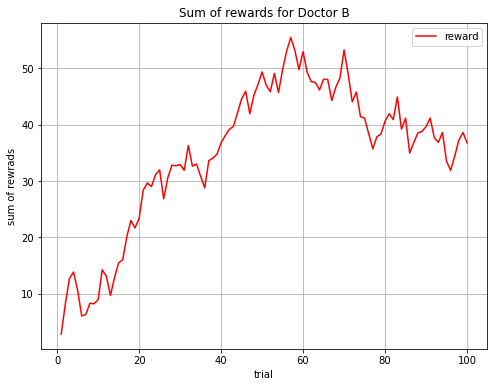

Lower bound: 7.245994257427223
Upper bound:  53.10439686750718


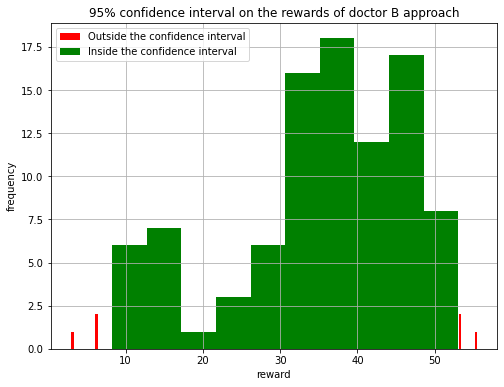

--------------------------------------------------------------------


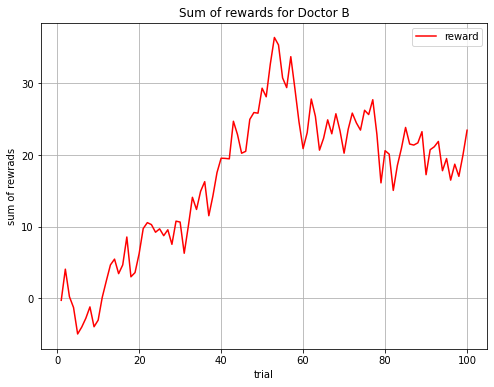

Lower bound: -3.522587918060955
Upper bound:  33.24161007195348


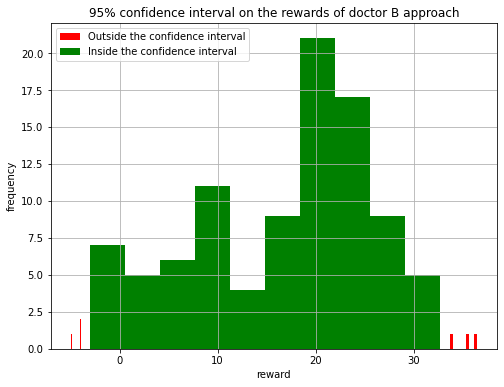

--------------------------------------------------------------------


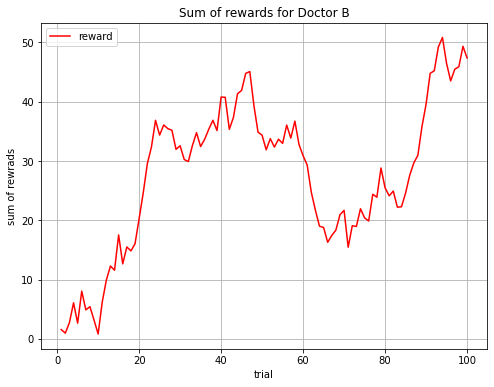

Lower bound: 2.0683233036353177
Upper bound:  48.34673453836287


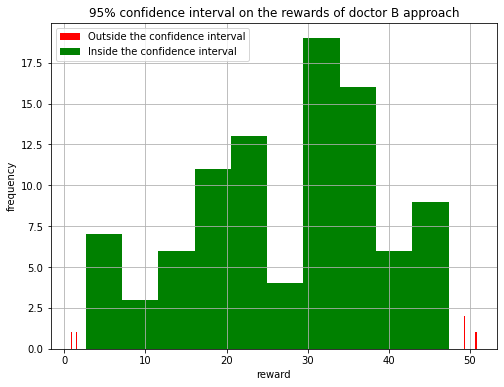

--------------------------------------------------------------------


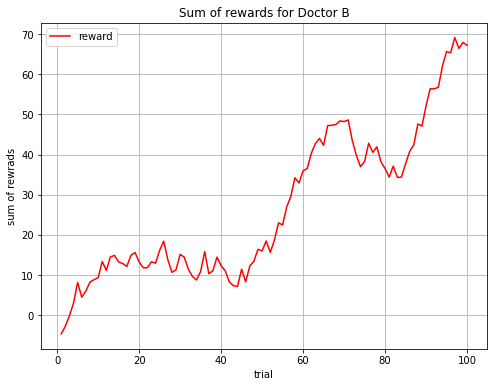

Lower bound: 1.3527075506723627
Upper bound:  66.82708169519272


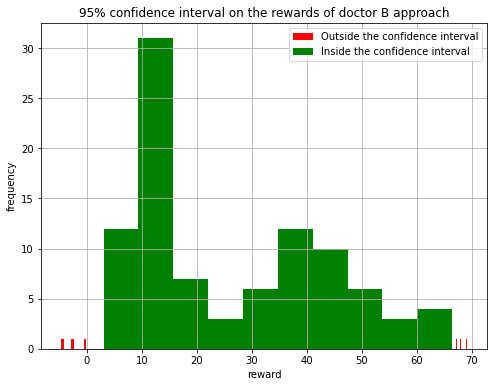

--------------------------------------------------------------------


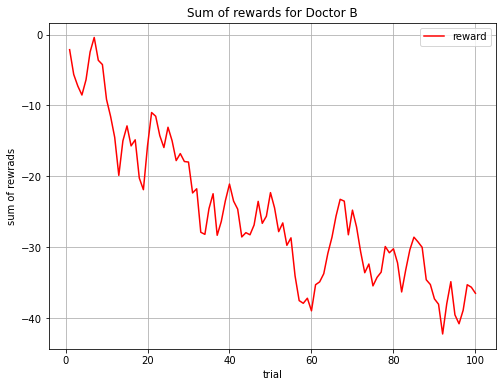

Lower bound: -39.25139902192659
Upper bound:  -3.0069422737658047


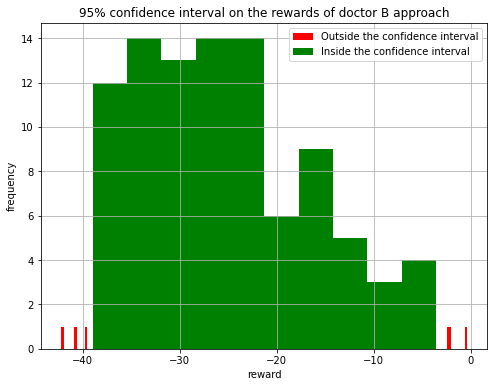

--------------------------------------------------------------------


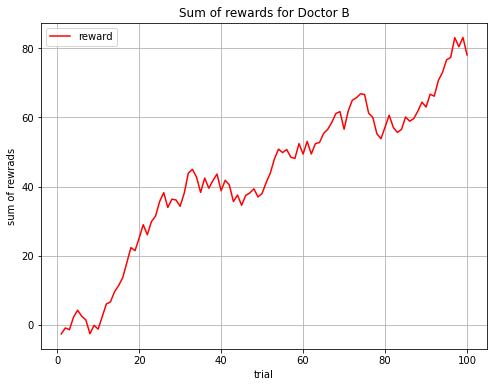

Lower bound: -1.3083366693296952
Upper bound:  79.27372400957822


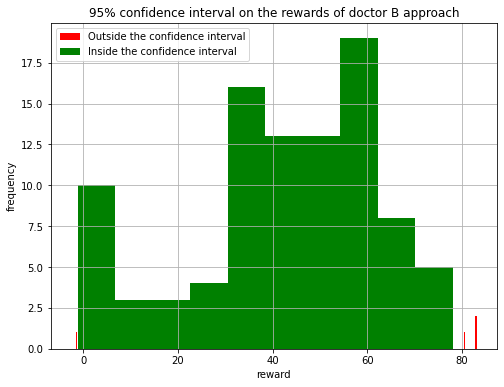

--------------------------------------------------------------------


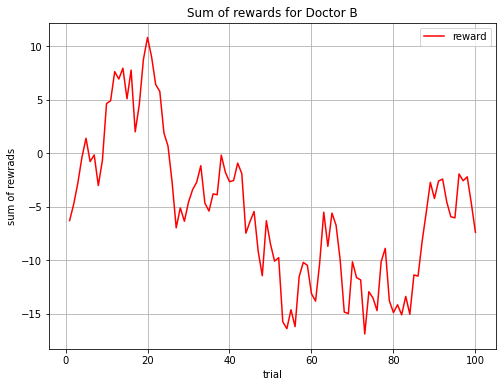

Lower bound: -15.998864641059695
Upper bound:  8.3571528934307


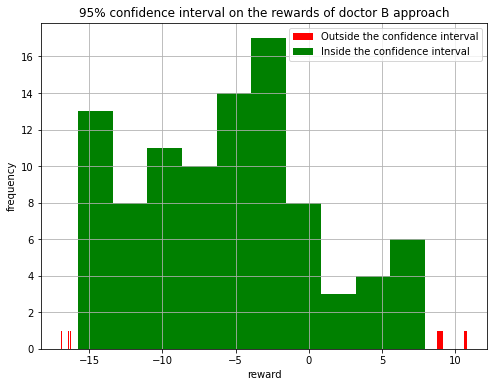

--------------------------------------------------------------------


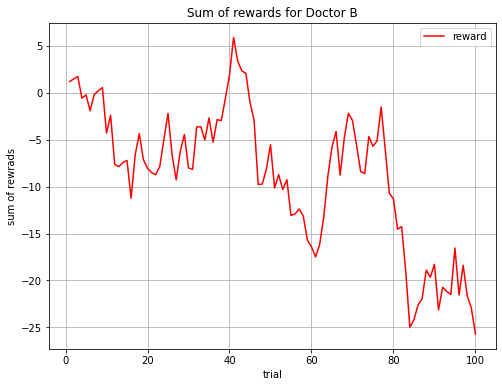

Lower bound: -23.67208775258195
Upper bound:  2.183334831972263


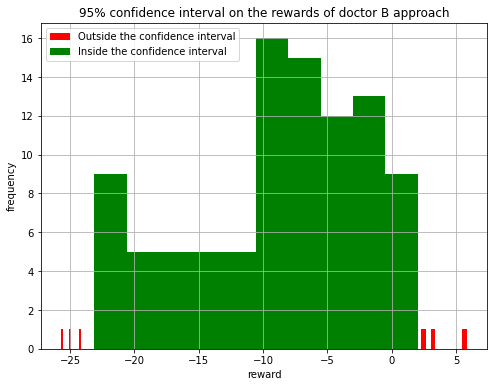

--------------------------------------------------------------------


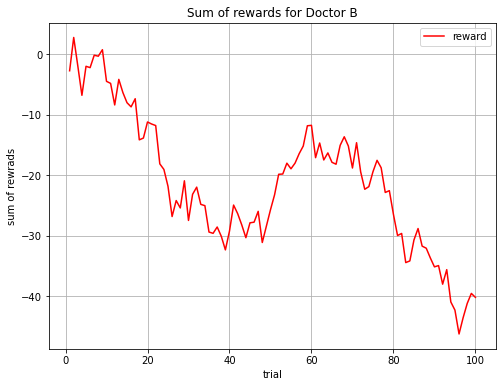

Lower bound: -41.799954637021685
Upper bound:  -0.2331183228225629


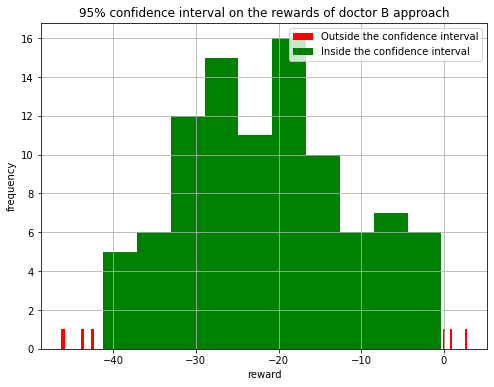

--------------------------------------------------------------------


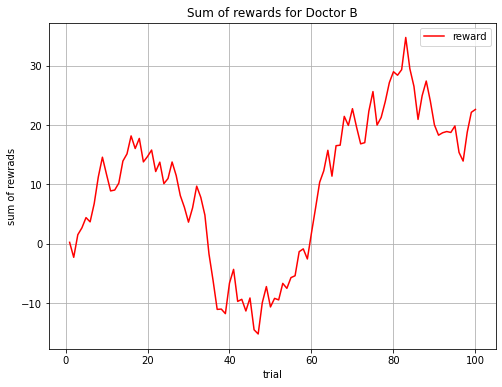

Lower bound: -11.571948110374374
Upper bound:  29.203197386444383


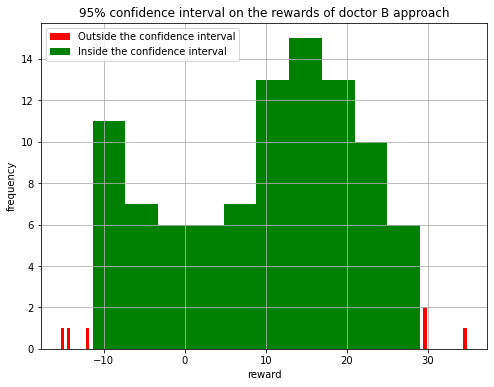

--------------------------------------------------------------------


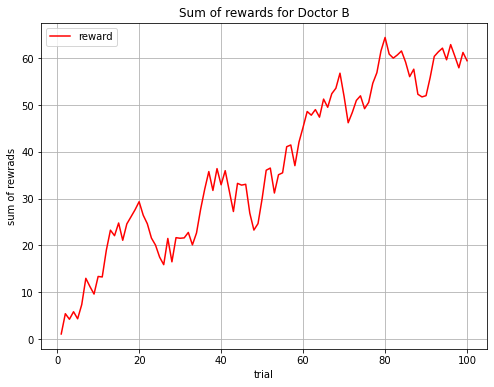

Lower bound: 4.82781808639437
Upper bound:  61.86527613249453


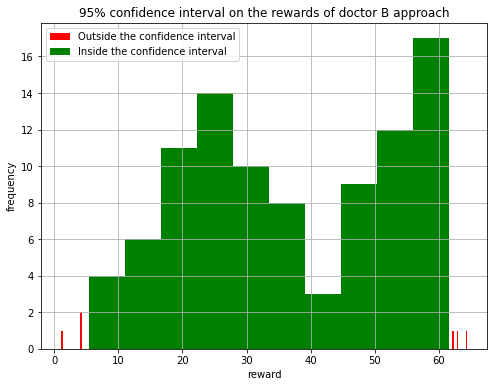

--------------------------------------------------------------------


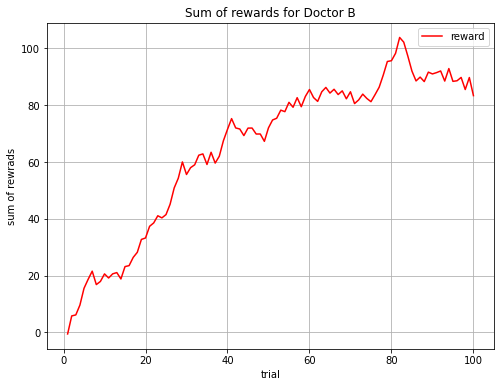

Lower bound: 7.768596815553761
Upper bound:  97.78567091031304


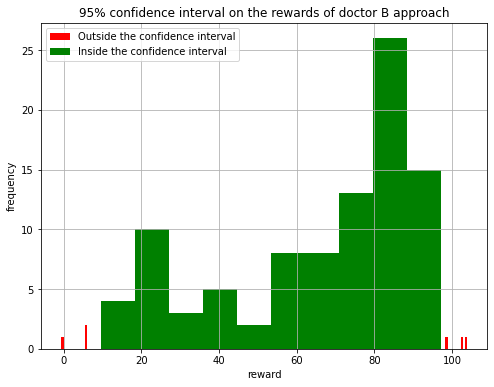

--------------------------------------------------------------------


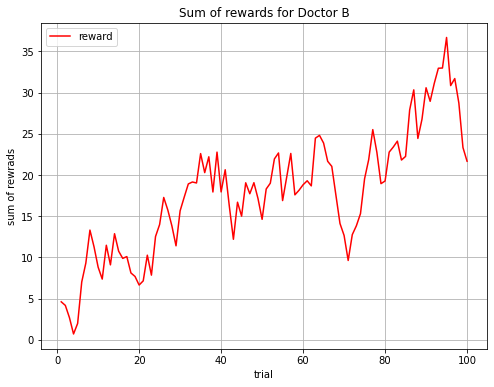

Lower bound: 3.3837548559667514
Upper bound:  32.360453995617725


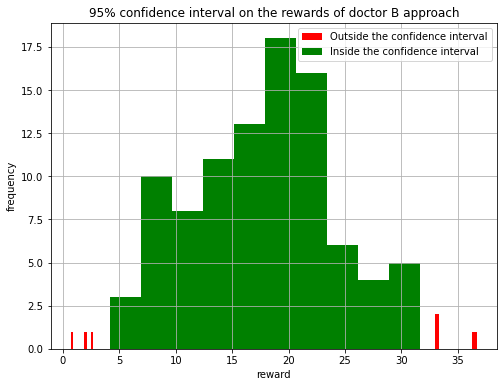

--------------------------------------------------------------------


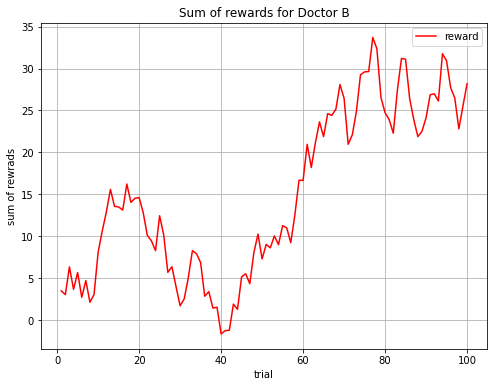

Lower bound: -0.03542344730127511
Upper bound:  31.502128422852987


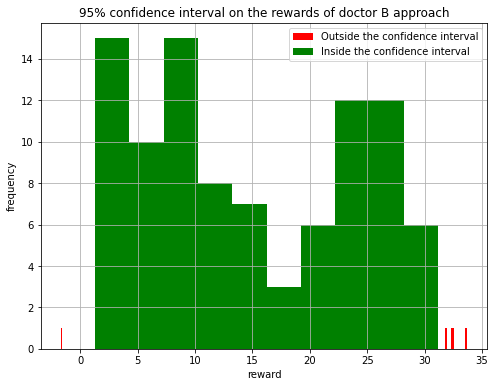

--------------------------------------------------------------------


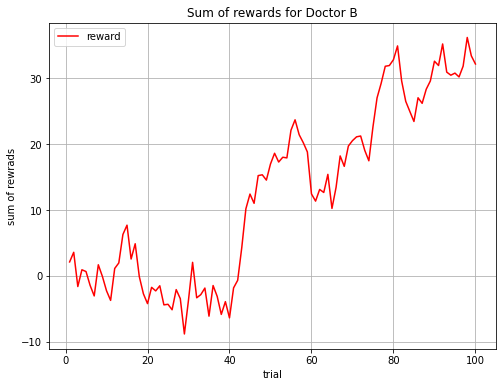

Lower bound: -6.002348720219944
Upper bound:  34.22372606816322


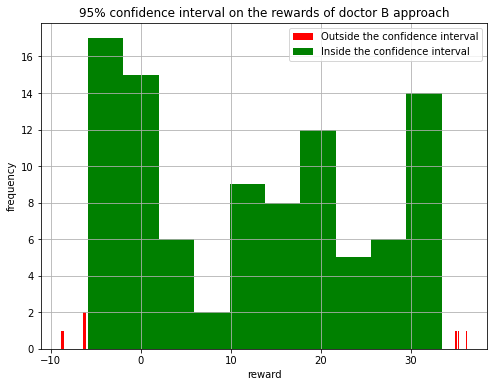

--------------------------------------------------------------------


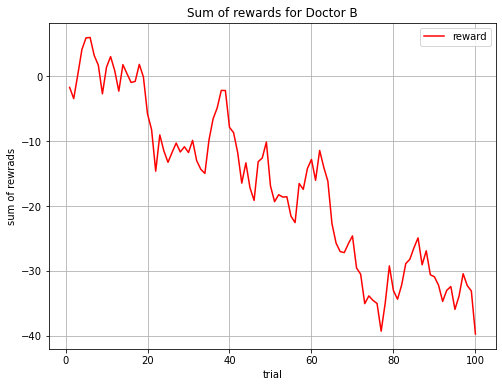

Lower bound: -35.52411906196352
Upper bound:  3.692835208729833


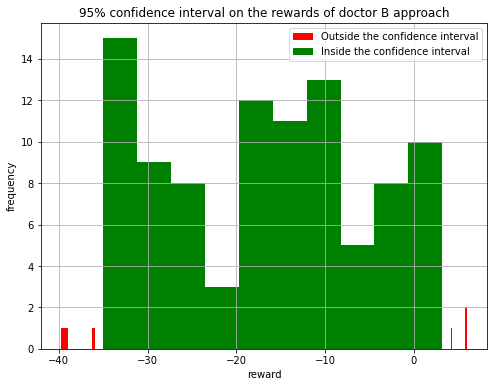

--------------------------------------------------------------------


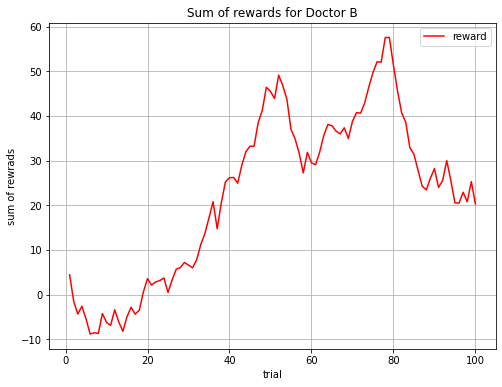

Lower bound: -8.392294522935469
Upper bound:  52.06972495521119


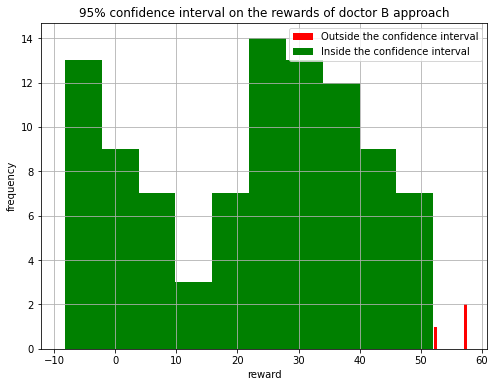

--------------------------------------------------------------------


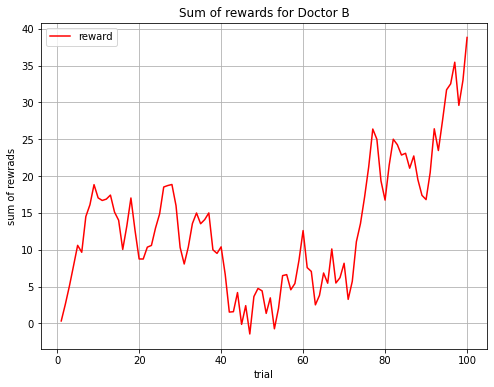

Lower bound: 0.08860469923588843
Upper bound:  32.77979424173414


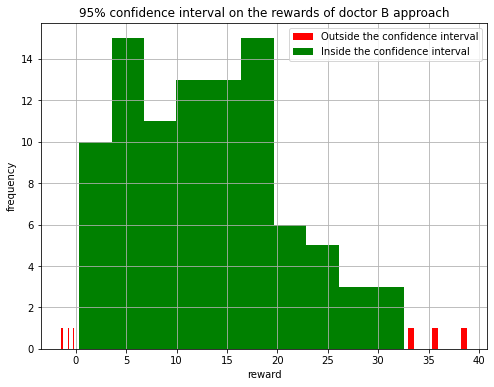

--------------------------------------------------------------------


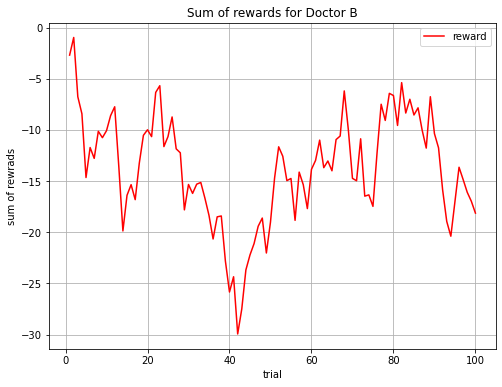

Lower bound: -25.12699308377257
Upper bound:  -5.52520862063317


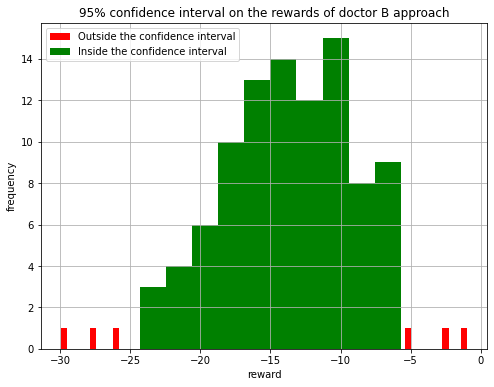

--------------------------------------------------------------------


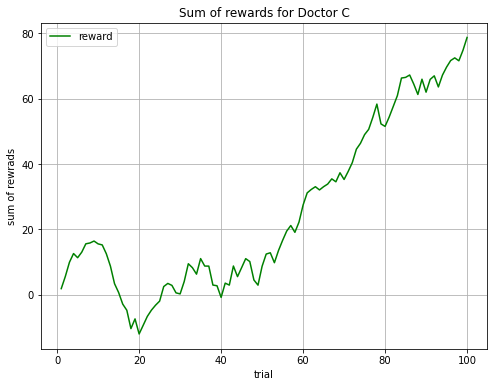

Lower bound: -8.411980954576439
Upper bound:  72.12029941127572


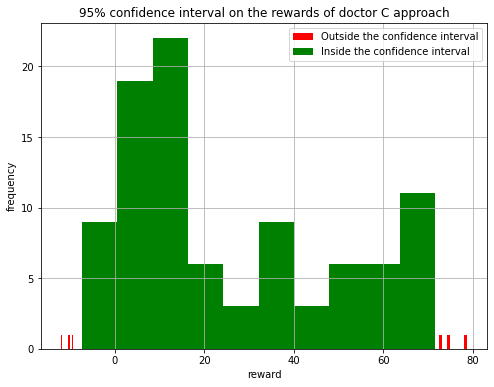

--------------------------------------------------------------------


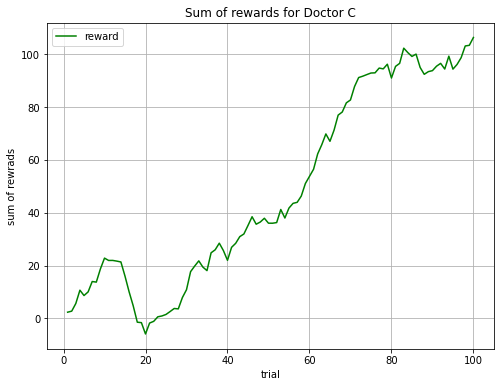

Lower bound: -1.5177910879203553
Upper bound:  102.69656816791564


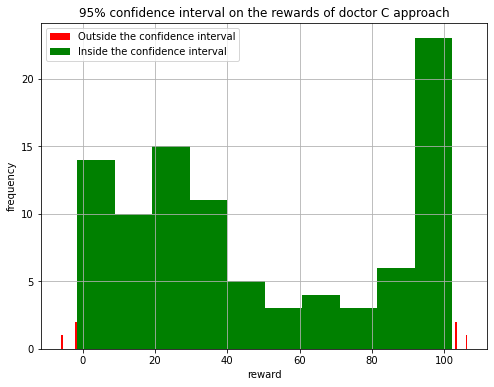

--------------------------------------------------------------------


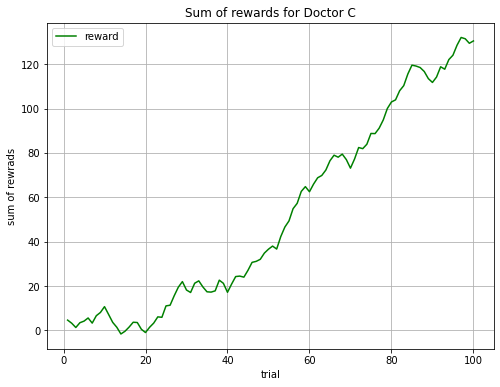

Lower bound: -0.00485046344426765
Upper bound:  129.99120648813377


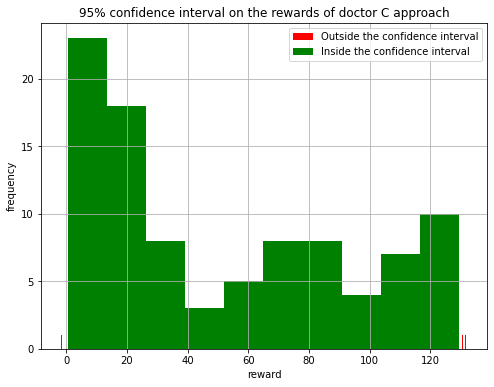

--------------------------------------------------------------------


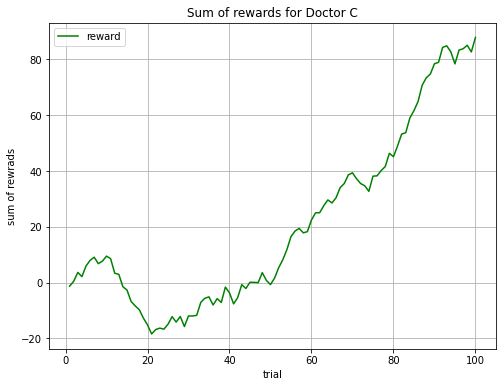

Lower bound: -16.509371603926965
Upper bound:  84.57419447203246


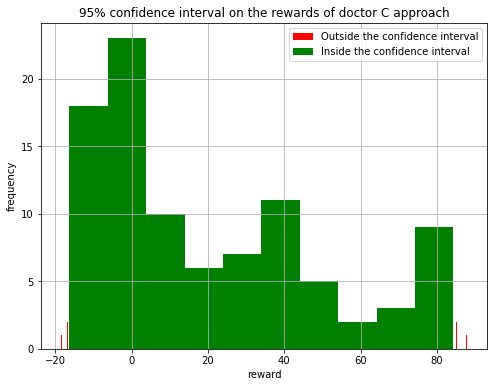

--------------------------------------------------------------------


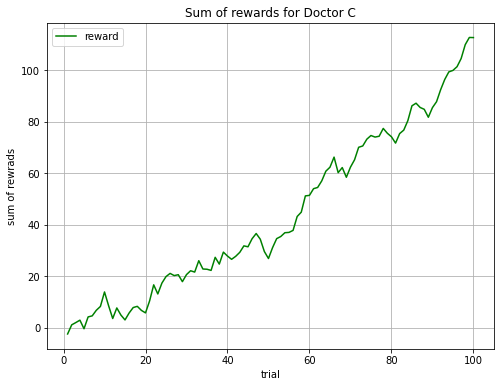

Lower bound: 1.587532924570967
Upper bound:  107.24180258899791


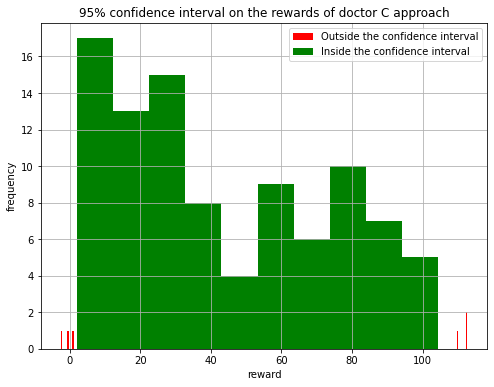

--------------------------------------------------------------------


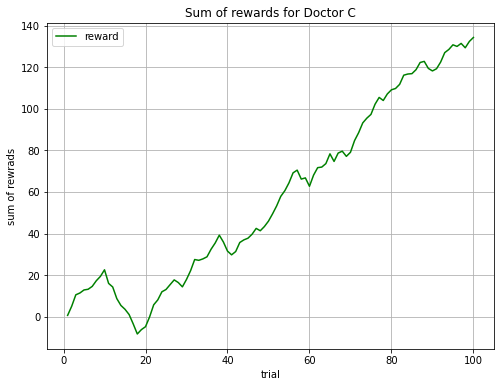

Lower bound: -4.160764368254021
Upper bound:  131.07379776053455


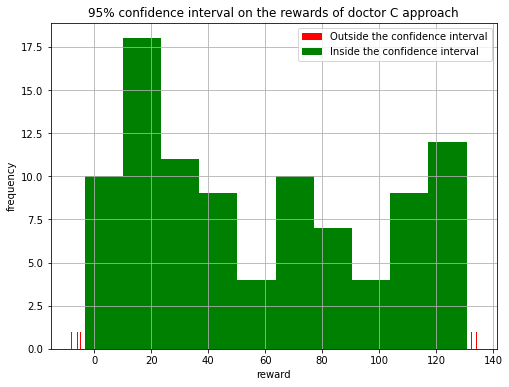

--------------------------------------------------------------------


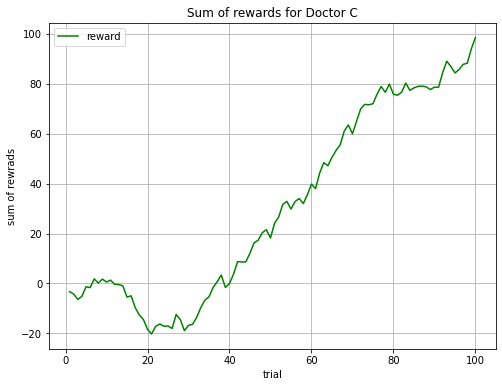

Lower bound: -18.236370420617437
Upper bound:  88.69613262600254


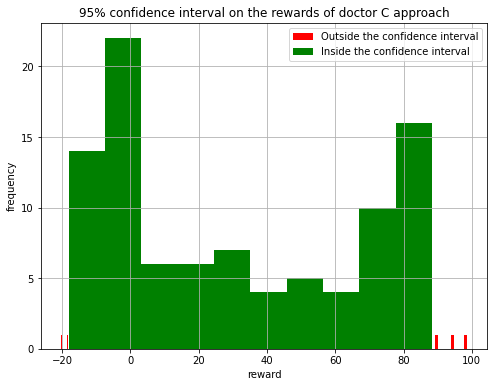

--------------------------------------------------------------------


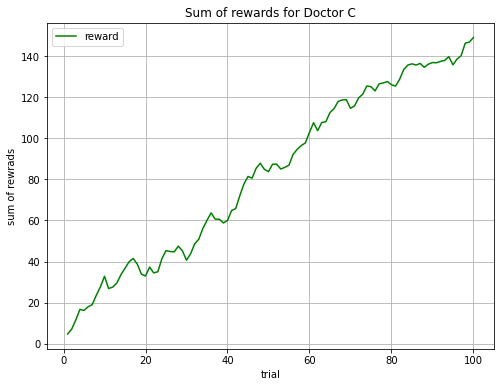

Lower bound: 13.72664013822159
Upper bound:  143.54277129124165


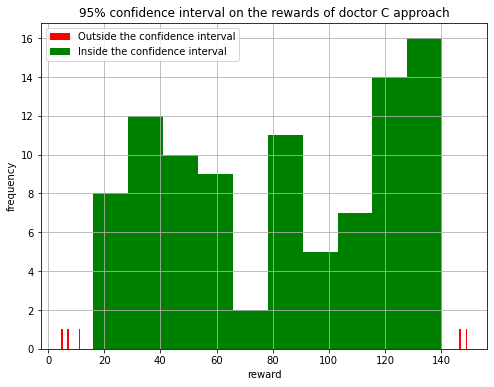

--------------------------------------------------------------------


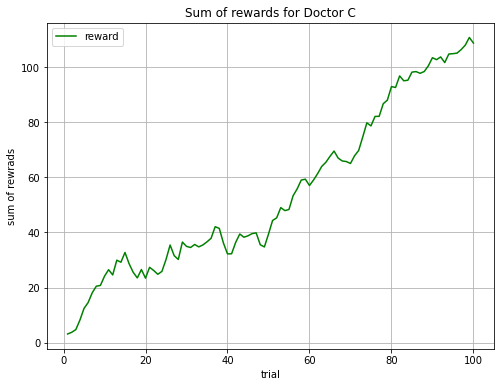

Lower bound: 6.362095060959307
Upper bound:  107.17070851097691


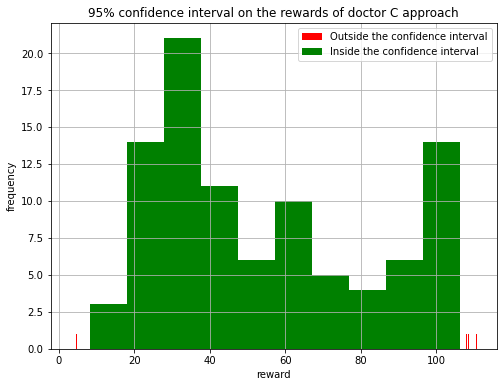

--------------------------------------------------------------------


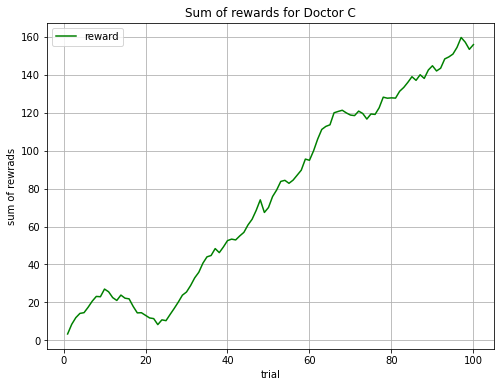

Lower bound: 9.39662398262449
Upper bound:  155.13177132989247


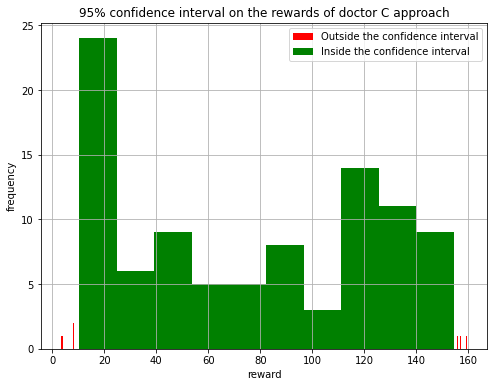

--------------------------------------------------------------------


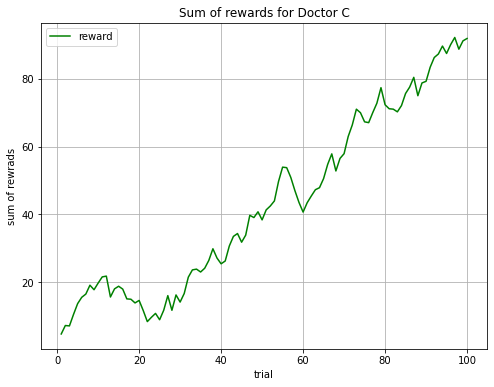

Lower bound: 7.75552825025035
Upper bound:  90.66737199022965


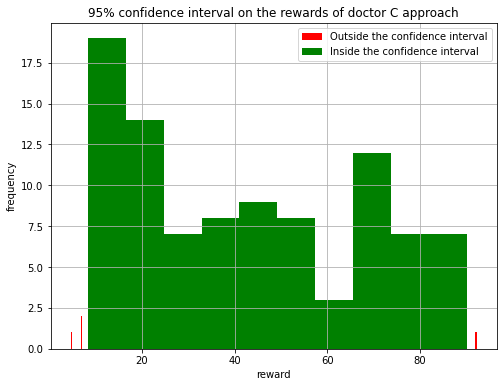

--------------------------------------------------------------------


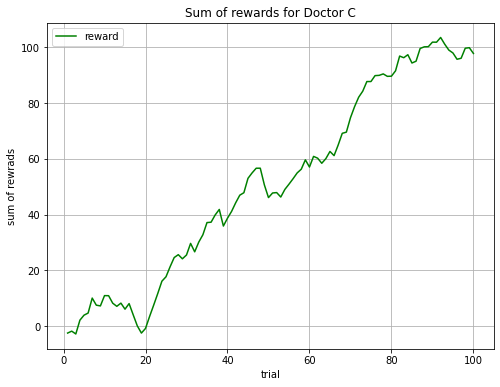

Lower bound: -2.1662396292192962
Upper bound:  101.46582494292619


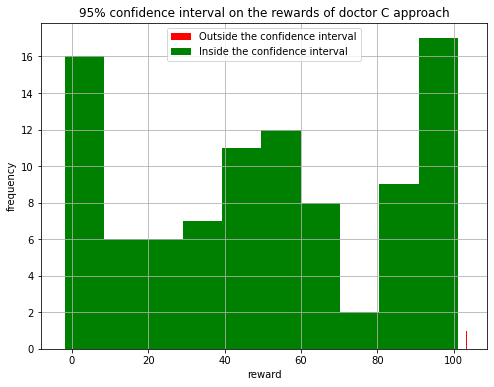

--------------------------------------------------------------------


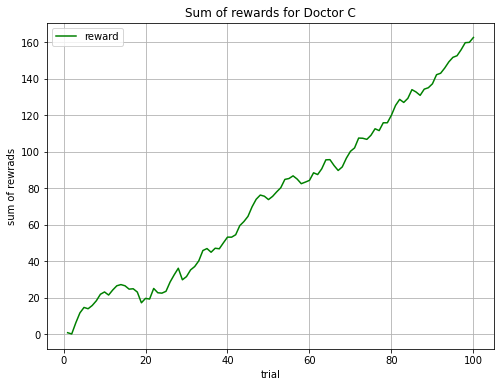

Lower bound: 8.91927586287964
Upper bound:  157.94419088667883


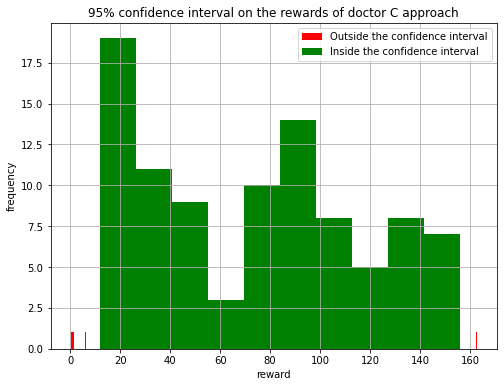

--------------------------------------------------------------------


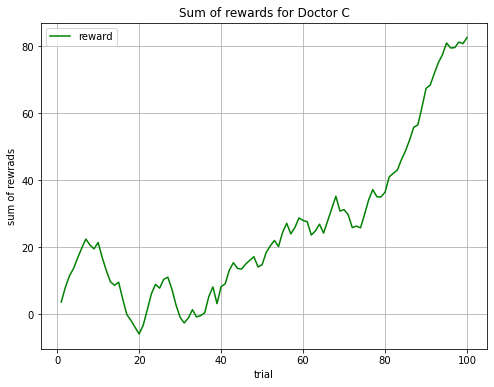

Lower bound: -2.9323308992919515
Upper bound:  80.8541302711982


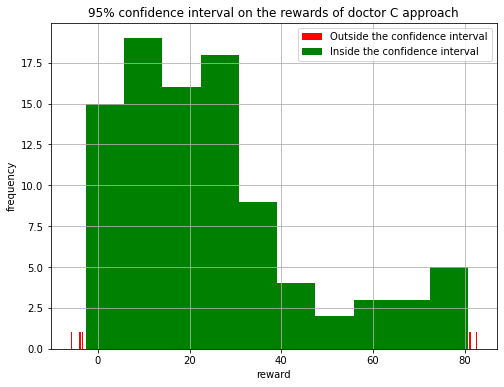

--------------------------------------------------------------------


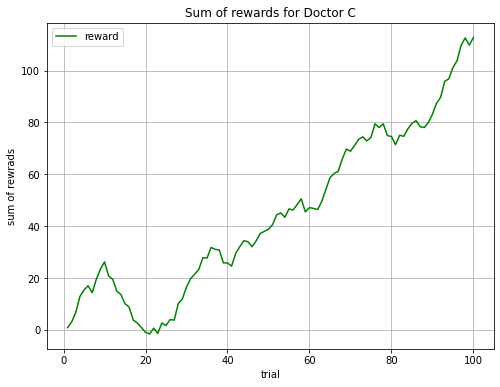

Lower bound: -0.187725011591512
Upper bound:  109.78366725884874


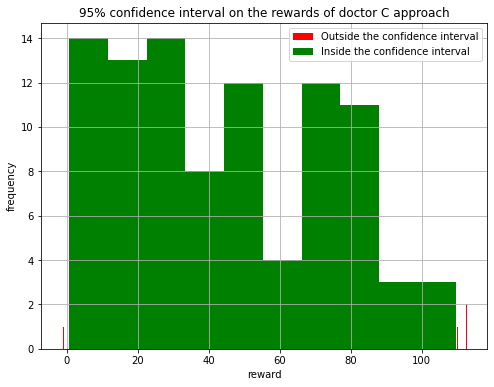

--------------------------------------------------------------------


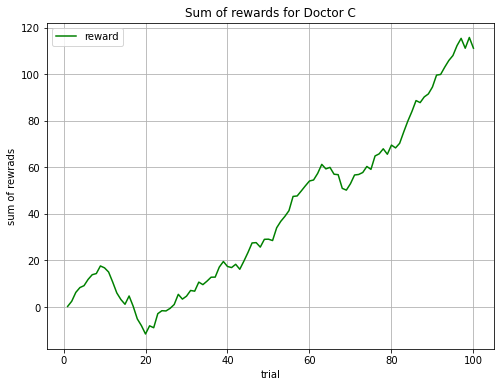

Lower bound: -8.007910308536587
Upper bound:  111.7156946005606


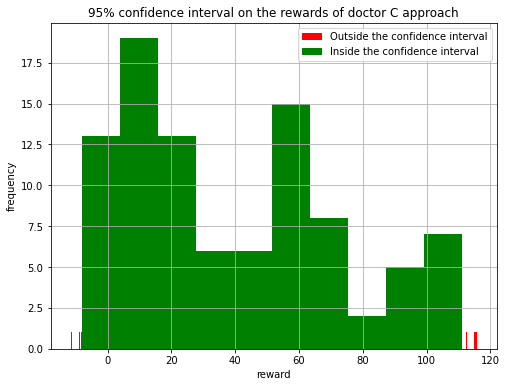

--------------------------------------------------------------------


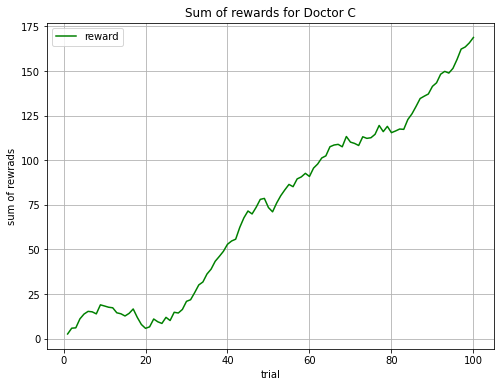

Lower bound: 5.930762468568495
Upper bound:  162.8780734257963


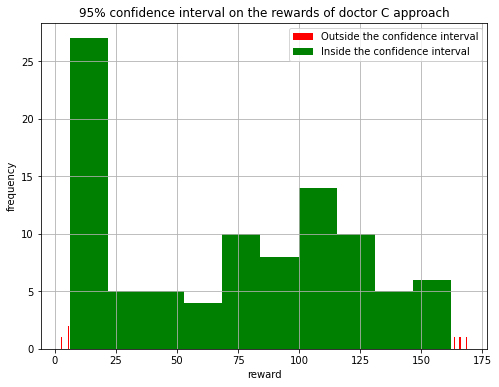

--------------------------------------------------------------------


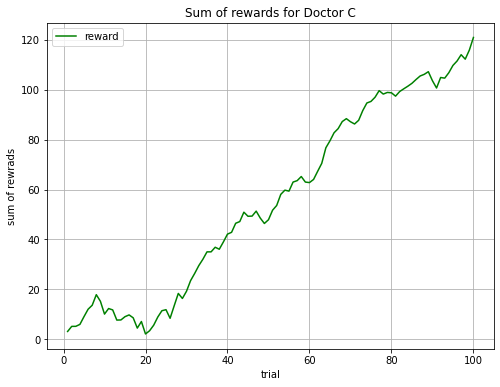

Lower bound: 3.9634654299353795
Upper bound:  113.14883696987248


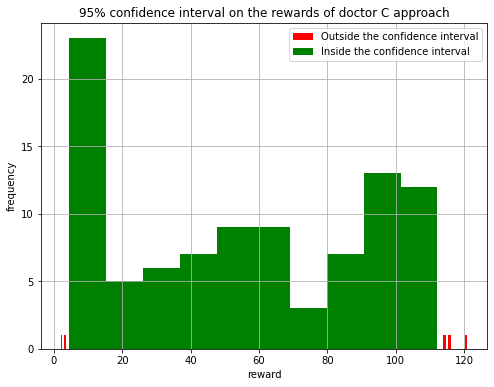

--------------------------------------------------------------------


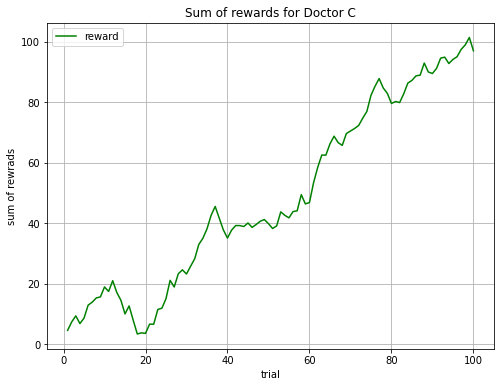

Lower bound: 4.187653201393411
Upper bound:  97.22219741935095


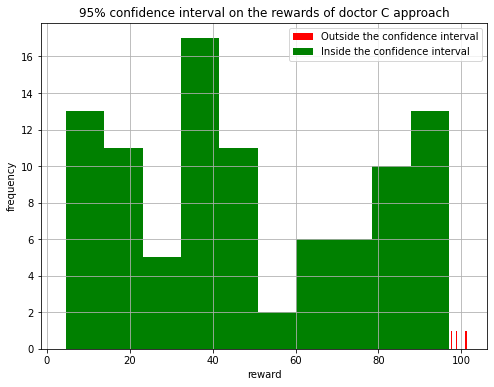

--------------------------------------------------------------------


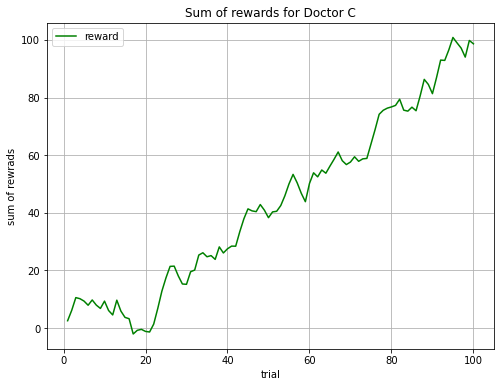

Lower bound: -0.9926743257627754
Upper bound:  98.82322345893257


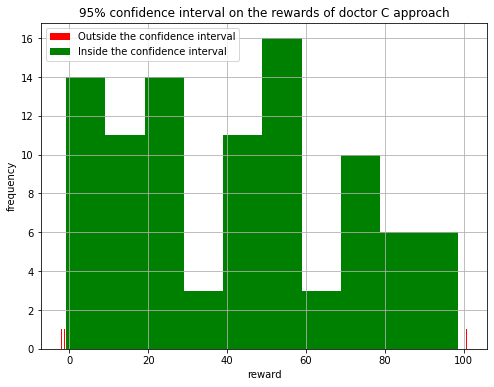

--------------------------------------------------------------------


In [108]:
for i in range(20):
    all_rewards = doctor_a_approach()
    draw_reward_trial_plot(all_rewards, "A", 'b')
    draw_confidence_interval(all_rewards, "A")
    print("--------------------------------------------------------------------")
    
print("=================================================================================")
    
for i in range(20):
    all_rewards = doctor_b_approach()
    draw_reward_trial_plot(all_rewards, "B", 'r')
    draw_confidence_interval(all_rewards, "B")
    print("--------------------------------------------------------------------")
    
print("=================================================================================")
    
for i in range(20):
    all_rewards = doctor_c_approach()
    draw_reward_trial_plot(all_rewards, "C", 'g')
    draw_confidence_interval(all_rewards, "C")
    print("--------------------------------------------------------------------")